In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/exam.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   20 non-null     float64
 1   pass    20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [4]:
df.head()

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [5]:
df.describe()

,hours,pass
count,20.000000,20.000000
mean,2.787500,0.500000
std,1.507165,0.512989
min,0.500000,0.000000
25%,1.687500,0.000000
50%,2.625000,0.500000
75%,4.062500,1.000000
max,5.500000,1.000000


In [6]:
X = df[['hours']]
y = df['pass']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
X_train.shape, X_test.shape

((14, 1), (6, 1))

In [11]:
#import thư viện logistic
from sklearn.linear_model import LogisticRegression

In [12]:
#khởi tạo model
model = LogisticRegression()

In [13]:
# huấn luyện model
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# tính toán xác suất của lớp cho tập dữ liệu

In [15]:
yhat_train = model.predict_proba(X_train)

In [18]:
yhat_test_proba = model.predict_proba(X_test)

In [19]:
yhat_test_proba

array([[0.70109761, 0.29890239],
       [0.05739707, 0.94260293],
       [0.50248738, 0.49751262],
       [0.57219436, 0.42780564],
       [0.92674221, 0.07325779],
       [0.19871404, 0.80128596]])

In [20]:
yhat_test = model.predict(X_test)

In [21]:
yhat_test

array([0, 1, 0, 0, 0, 1], dtype=int64)

In [23]:
y_test

8     1
19    1
11    0
10    1
1     0
15    1
Name: pass, dtype: int64

In [25]:
model.score(X_test, y_test)

0.6666666666666666

In [26]:
model.score(X_train, y_train)

0.8571428571428571

In [32]:
from scipy.stats import linregress
import math

In [30]:
info = linregress(X['hours'], y)
info

LinregressResult(slope=0.23459561219317931, intercept=-0.1539352689884873, rvalue=0.689243146277994, pvalue=0.0007751131598569146, stderr=0.058125622469009215)

In [41]:
model.intercept_

array([-3.38027132])

In [35]:
# hours = 4
p = 1/(1 + math.exp(-(info.intercept + info.slope*4)))
p

0.6866377906186065

In [34]:
X_new = np.linspace(0, 6, 1000).reshape(-1,1)
X_new[0:5]

array([[0.        ],
       [0.00600601],
       [0.01201201],
       [0.01801802],
       [0.02402402]])

In [36]:
yhat_proba = model.predict_proba(X_new)

In [38]:
yhat_proba[995:]

array([[0.03444356, 0.96555644],
       [0.03421986, 0.96578014],
       [0.03399757, 0.96600243],
       [0.03377667, 0.96622333],
       [0.03355715, 0.96644285]])

In [39]:
X_new[995:]

array([[5.97597598],
       [5.98198198],
       [5.98798799],
       [5.99399399],
       [6.        ]])

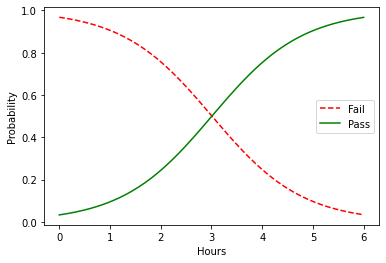

In [40]:
plt.plot(X_new, yhat_proba[:, 0], 'r--', label='Fail')
plt.plot(X_new, yhat_proba[:, 1], 'g-', label='Pass')
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.legend()